## MIC介绍
MIC(the maximal information coefficient最大信息系数) 属于更大的一类基于最大信息的非参数探索(MINE)统计，是一种用于识别和分类两个变量之间关联性的统计方法。它的主要特点是能够检测到各种类型的关联关系，包括线性和非线性关系，而且不受数据尺度的影响。MIC广泛用于数据挖掘、机器学习和统计分析中。 
MIC能够发现函数关系和非函数关系，并且对于函数关系提供了一个分数，该分数大致等于相对于回归函数的数据的决定系数($R^2$)。  
* 非参数方法： 不依赖于特定的概率分布假设，因此适用于各种数据类型，包括连续和离散变量。

### MIC基于这样的思想:

如果两个变量之间存在关系，那么可以在两个变量的散点图上绘制网格，将二维空间在 x,y 方向分别划分为一定的区间数，然后查看当前的散点在各个方格中落入的情况，以此作为互信息中的联合概率。
* 为了计算一组双变量数据的MIC，根据样本量$(n)$探索所有网格，直至最大网格分辨率(通常$xy<n^{0.6}$)  
* 为每对整数$(x,y)$计算$x × y$网格内的最大可能互信息。  
* 对这些互信息值进行归一化，以确保不同维度网格之间的公平比较，得到0到1之间的值。  
* 定义特征矩阵$M = (m_{x,y})$，其中$m_{x,y}$为任意$x × y$网格所获得的最高归一化互信息。  
* 统计量MIC即为M中的最大值。

更正式的，对于网格$G$，令$I_G$表示网格$G$上概率分布的互信息，其中一个方格内的概率与落在该方格内点的数量成正比。  
特征矩阵$M$中第$(x, y)$项$m_{x,y} = \frac{\max{I_G}}{\log{\min{x,y}}}$，其中$\max{I_G}$是$x × y$网格$G$中最大互信息，$xy<B$, $B = n^{0.6}$, n为数据量大小。  
$MIC$为$M$中最大值。  
值得注意的是，虽然互信息被用来量化每个网格的性能，但MIC并不是互信息的估计。

### 计算过程

<div>

<img alt='计算过程' src='mic_compute.png' width=300 style='float: left; margin-right: 30px;'>

计算过程如图：  
1. 将一个关系分割成$x × y$的网格，分别计算所有可能划分方式能得到的最大互信息。
2. 以图中$2 × 2$网格为例，所有可能划分方式表示四个象限的中心落在平面上任意位置切割得到的划分，然后利用互信息的计算公式，计算该划分下的互信息。然后依次计算所有可能的划分方式的互信息，取其中最大值作为$2 × 2$情况下的最大互信息。（图A）
3. 需要注意对这些互信息值进行归一化，以确保不同维度网格之间的公平比较。
4. 同样地，计算$2 × 3$、$2 × 4$、$3 × 3$......的最大互信息。可以看到图中对于每种$x × y$，都计算了一个最大互信息放在特征矩阵$M = (m_{x,y})$中（图B）
5. 直到达到阈值，即上文所提到的$xy<n^{0.6}$
6. 然后MIC即为M中最大值（图C）
   
</div>

### 时间复杂度

论文中提到使用一种动态规划方法加速计算。  
容易想到, 计算$i = 3, j = 4$的$(3, 4)$网格时，可以利用到$(3, 3)$网格中$i$方向的信息。即其中的$p(x)$（$i=3$时$p(x)$不变）。同样的，若x方向上有两次划分是同样的（切在了同一个位置），就相当于x的维度减少了1。  
即，若在计算$(3, 4)$的过程中可以只要x有两次的划分方式是一样的那么就同时计算了$(2, 4)$的网格。  
原文或许是在此加快了运算。  
容易想象，对于一个二维空间中的分布，比如将要计算的数据集，每一列的数据量是4898，那么$B = n^{0.6} = 164$。  
那么比如计算$12 × 12$的网格（$xy=144$），对于4898个数据，x的第一次划分有4898种方式，第二次划分有4897种......
同样，对于y方向也有同样数量的划分......  
而若考虑在计算$12 × 12$的网格的同时可以把所有$x, y < 12$的情况计算到，大致需要计算的互信息的数量级也在$n^{xy} （n^{n^{0.6}}）$。  
还没有考虑计算互信息所需的开销，因此可以简单的分析出计算MIC的时间复杂度极高，对于所给数据集，手动编写计算MIC一晚上或许都难以计算完成。  
查阅资料可知，数据的分桶（binning）过程（对离散和连续变量进行统一处理）可以使用等宽分桶或等频分桶等方法。即不需要遍历所有划分方式。  

---

<div>

### MIC的主要特征

* 普适性：拥有足够的统计样本时，可以捕获广泛的关系，而不限定于特定的函数类型（如线性、指数型、周期型等）。
  1. 所有非恒定的无噪声函数关系得分趋于1;
  2. 大部分的无噪声关系(包括无噪声函数关系的叠加)得分趋于1;
  3. 独立的变量得分趋于0。  

* 均衡性：对不同类型的噪声程度同等的关系给予相近的分数。无噪声函数关系(即$R^2 = 1.0$)的MIC分数接近1.0。对于具有不同样本量、噪声水平和噪声模型的大量测试函数，MIC大致等于相对于每个各自的无噪声函数的决定系数$R^2$。  

</div>

## 互信息

设两个随机变量$(X, Y)$的联合分布为$p(x, y)$，边缘分布分别为$p(x), p(y)$，互信息$I(X; Y)$是联合分布$p(x, y)$与边缘分布$p(x), p(y)$的相对熵  
即
$$I[X; Y] = \sum_{X,Y} p(x, y)\log{\frac{p(x, y)}{p(x)p(y)}}$$

## 导入UCI红酒质量数据集

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
Y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [2]:
X = wine_quality.data.features 
Y = wine_quality.data.targets 

In [3]:
data = wine_quality.data.original
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


mine = MINE(alpha=0.6, c=15)
* alpha（默认值为0.6）： alpha参数控制MIC的非线性特性。MIC计算包括将数据点按顺序排序，并寻找最大化条件熵的变换。alpha决定了条件熵的估计方法，从0到1的范围内选择不同的值可以调整MIC的非线性性。较小的alpha值会增加MIC的线性性，而较大的alpha值会增加MIC的非线性性。通常，0.6是一个合理的默认值。
* c（默认值为15）： c参数用于控制MIC计算中的bin数。MIC的计算涉及将数据分成多个bin，c值决定了bin的数量。较大的c值会导致更多的细分，可能会更好地捕捉数据之间的关联性，但也会增加计算的复杂性和资源需求。较小的c值会导致较少的细分，计算速度更快，但可能会丧失一些关联性的细节。可以根据数据集的特性和计算资源来选择合适的c值。

In [4]:
import numpy as np
from minepy import MINE
from tqdm import *
 
mine = MINE(alpha=0.6, c=15)
mics = []
with tqdm(total=144) as pbar:
    for x in data:
        tl = []
        for y in data:
            mine.compute_score(data[x], data[y])
            tl.append(mine.mic())
            pbar.update(1)
        mics.append(tl)
    
df = pd.DataFrame(mics, index=data.columns, columns=data.columns)
df

  0%|          | 0/144 [00:00<?, ?it/s]

100%|██████████| 144/144 [00:20<00:00,  7.09it/s]


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,0.999160,0.039254,0.076289,0.077044,0.045593,0.032692,0.049243,0.136815,0.131629,0.024067,0.042967,0.027311
volatile_acidity,0.039254,0.999609,0.075385,0.073044,0.040237,0.041823,0.053428,0.097595,0.035070,0.031790,0.062928,0.064594
citric_acid,0.076289,0.075385,0.999958,0.062324,0.040643,0.038073,0.049560,0.100470,0.043282,0.033925,0.069729,0.065368
residual_sugar,0.077044,0.073044,0.062324,0.999991,0.107687,0.122664,0.182003,0.567330,0.076483,0.072553,0.203976,0.077282
chlorides,0.045593,0.040237,0.040643,0.107687,0.999636,0.057152,0.135500,0.248315,0.039595,0.045528,0.242654,0.081707
free_sulfur_dioxide,0.032692,0.041823,0.038073,0.122664,0.057152,0.999931,0.261216,0.151162,0.038059,0.033700,0.082418,0.064127
total_sulfur_dioxide,0.049243,0.053428,0.049560,0.182003,0.135500,0.261216,0.999991,0.283670,0.049364,0.065911,0.190168,0.086077
density,0.136815,0.097595,0.100470,0.567330,0.248315,0.151162,0.283670,1.000000,0.092782,0.100549,0.537438,0.156154
pH,0.131629,0.035070,0.043282,0.076483,0.039595,0.038059,0.049364,0.092782,0.999912,0.038433,0.049111,0.035091
sulphates,0.024067,0.031790,0.033925,0.072553,0.045528,0.033700,0.065911,0.100549,0.038433,0.999997,0.050177,0.029648


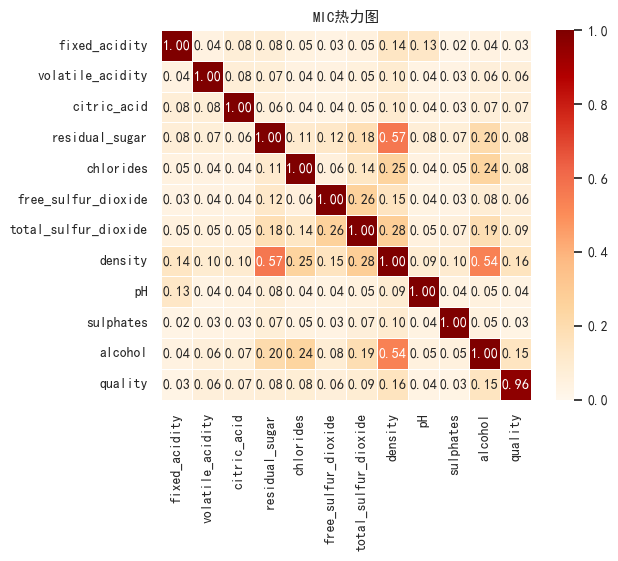

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(font_scale=0.9,rc=rc)

def draw_heatmap():
      plt.title('MIC热力图')
      sns.heatmap(df,
                  annot=True,  # 显示相关系数的数据
                  center=0.5,  # 居中
                  fmt='.2f',  # 只显示两位小数
                  vmin=0, vmax=1,  # 设置数值最小值和最大值
                  xticklabels=True, yticklabels=True,  # 显示x轴和y轴
                  square=True,  # 每个方格都是正方形
                  cbar=True,  # 绘制颜色条
                  linewidths=.5,
                  cmap="OrRd",        #刻度颜色
                  annot_kws={"size": 10}
                  )
      plt.show()
draw_heatmap()

100%|██████████| 144/144 [01:49<00:00,  1.31it/s]


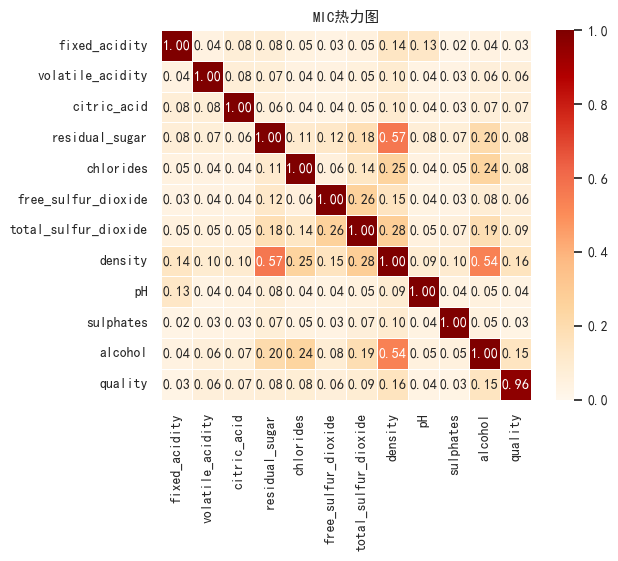

In [8]:
# 尝试其他参数情况下的计算结果
mine = MINE(alpha=0.6, c=60)
mics = []
with tqdm(total=144) as pbar:
    for x in data:
        tl = []
        for y in data:
            mine.compute_score(data[x], data[y])
            tl.append(mine.mic())
            pbar.update(1)
        mics.append(tl)
    
df = pd.DataFrame(mics, index=data.columns, columns=data.columns)
draw_heatmap()

100%|██████████| 144/144 [08:12<00:00,  3.42s/it]


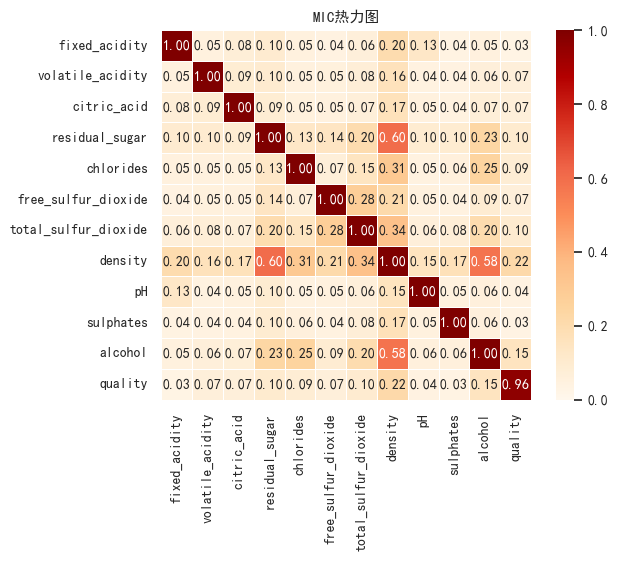

In [9]:
mine = MINE(alpha=0.7, c=60)
mics = []
with tqdm(total=144) as pbar:
    for x in data:
        tl = []
        for y in data:
            mine.compute_score(data[x], data[y])
            tl.append(mine.mic())
            pbar.update(1)
        mics.append(tl)
    
df = pd.DataFrame(mics, index=data.columns, columns=data.columns)
draw_heatmap()

100%|██████████| 144/144 [30:16<00:00, 12.62s/it]


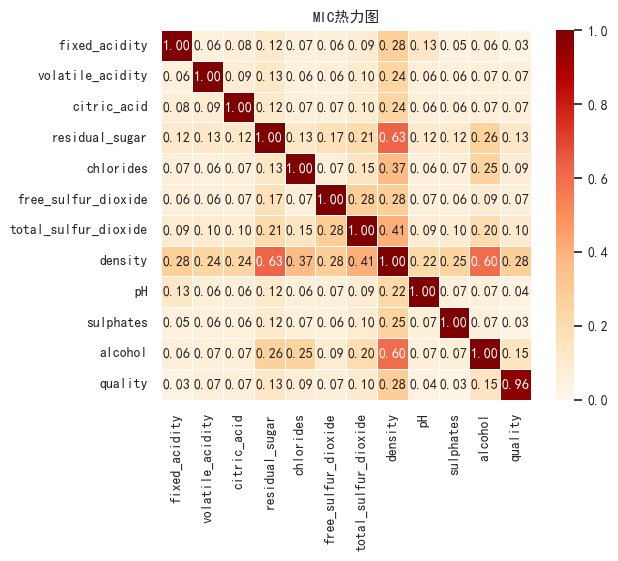

In [7]:
# 考虑到非线性关系较多，设置alpha=1并且增大分桶个数
# 实际测试后发现alpha=1时计算极其缓慢，考虑增大c值
mine = MINE(alpha=0.8, c=60)
mics = []
with tqdm(total=144) as pbar:
    for x in data:
        tl = []
        for y in data:
            mine.compute_score(data[x], data[y])
            tl.append(mine.mic())
            pbar.update(1)
        mics.append(tl)
    
df = pd.DataFrame(mics, index=data.columns, columns=data.columns)
draw_heatmap()

In [45]:
def draw_scatter(column):
    plt.figure(figsize=(12, 8))
    plt.subplot(231)
    sns.scatterplot(x=data[column], y=data['fixed_acidity'])
    plt.subplot(232)
    sns.scatterplot(x=data[column], y=data['volatile_acidity'])
    plt.subplot(233)
    sns.scatterplot(x=data[column], y=data['citric_acid'])
    plt.subplot(234)
    sns.scatterplot(x=data[column], y=data['residual_sugar'])
    plt.subplot(235)
    sns.scatterplot(x=data[column], y=data['chlorides'])
    plt.subplot(236)
    sns.scatterplot(x=data[column], y=data['free_sulfur_dioxide'])
    plt.show()
    plt.figure(figsize=(12, 8))
    plt.subplot(231)
    sns.scatterplot(x=data[column], y=data['total_sulfur_dioxide'])
    plt.subplot(232)
    sns.scatterplot(x=data[column], y=data['density'])
    plt.subplot(233)
    sns.scatterplot(x=data[column], y=data['pH'])
    plt.subplot(234)
    sns.scatterplot(x=data[column], y=data['sulphates'])
    plt.subplot(235)
    sns.scatterplot(x=data[column], y=data['alcohol'])
    plt.subplot(236)
    sns.scatterplot(x=data[column], y=data['quality'])
    plt.show()

绘制散点图，发现确实quality关于每一项参数都没有特别明显的线性关系  
不过奇怪的是quality-quality本身计算结果也不为1，可能由于quality是离散值，分桶的时候有一些小问题吧。

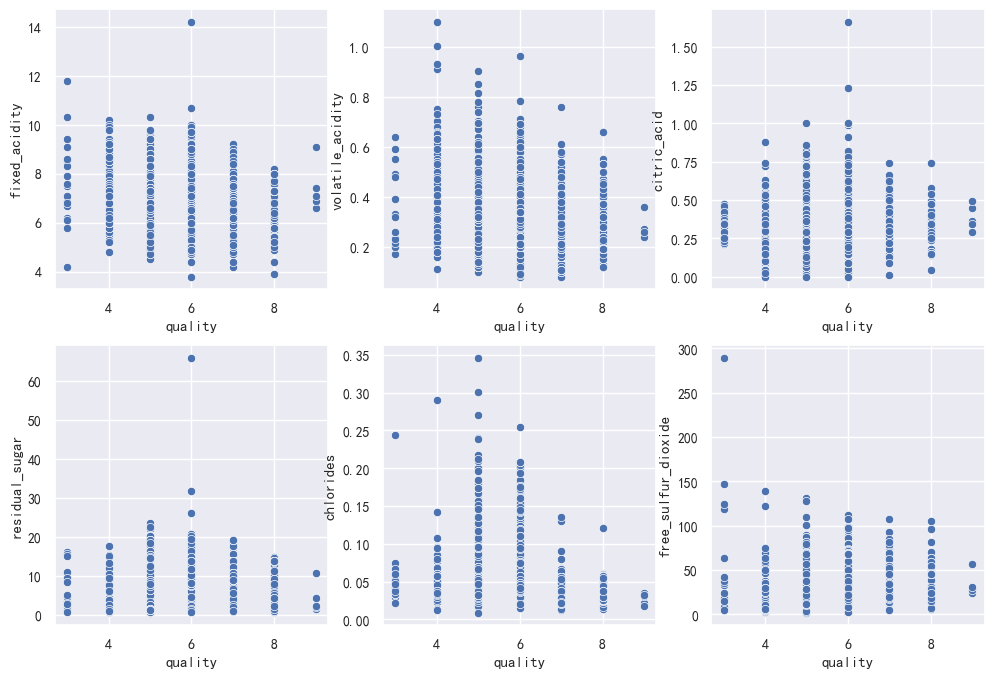

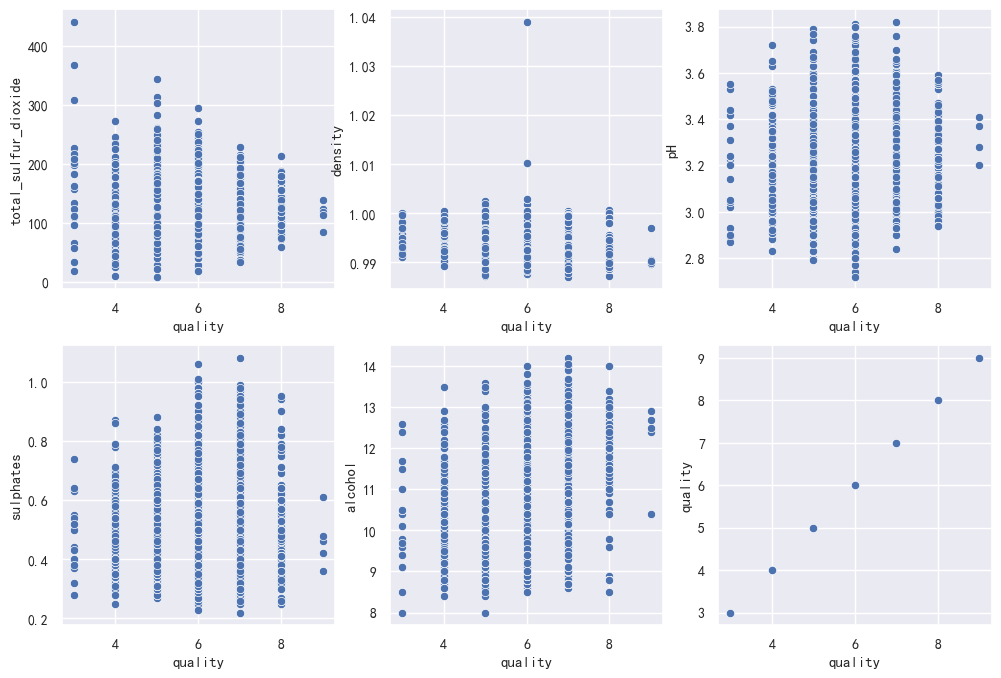

In [47]:
draw_scatter('quality')

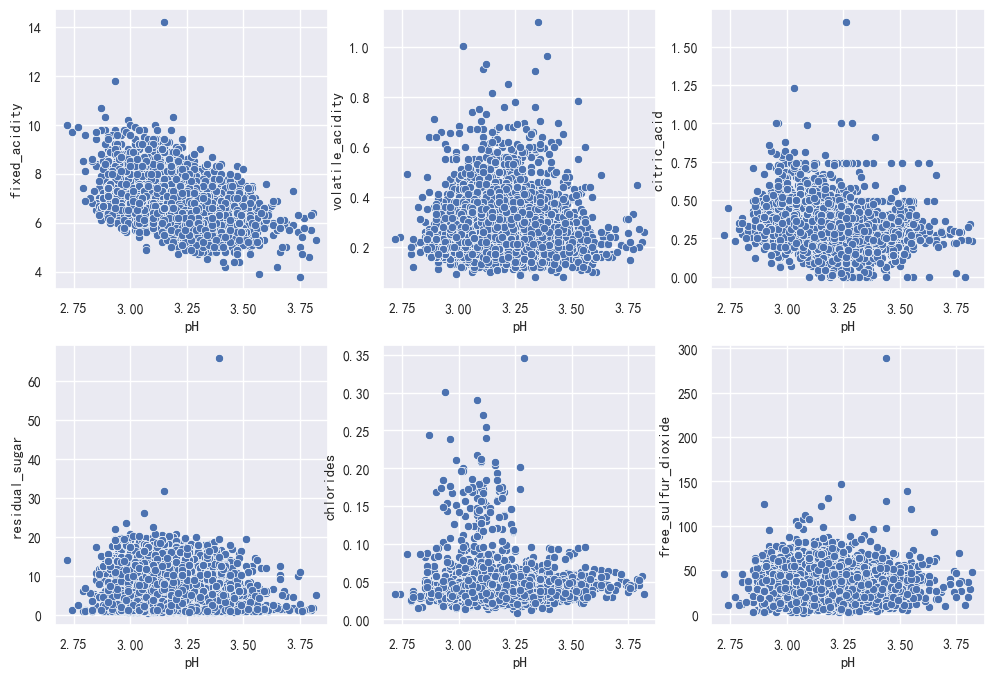

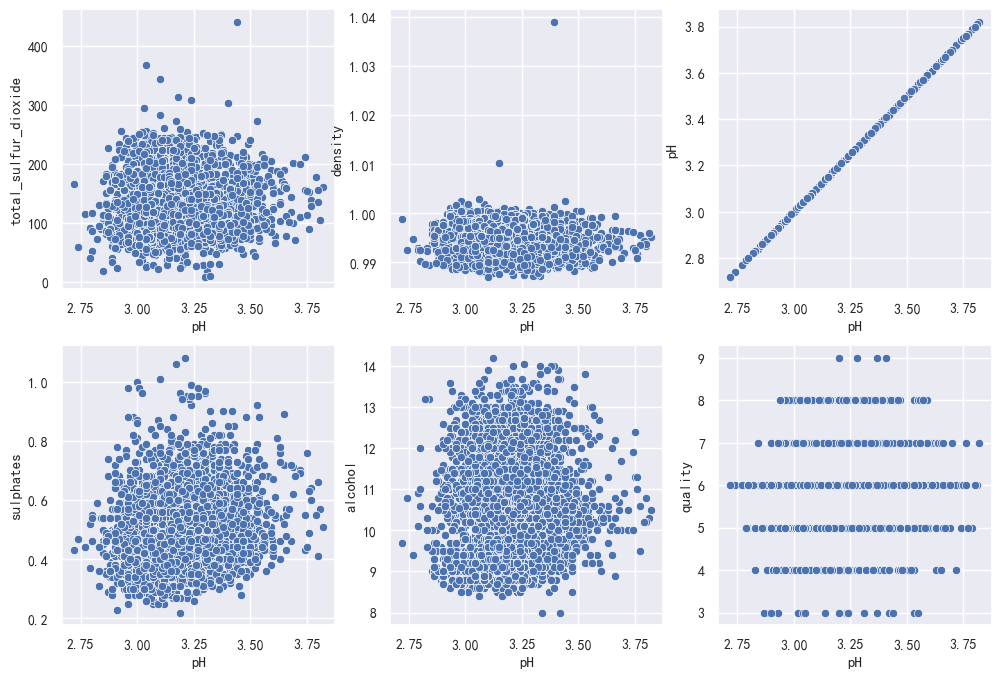

In [48]:
# 看看散点图，确实是有点惨不忍睹
draw_scatter('pH')

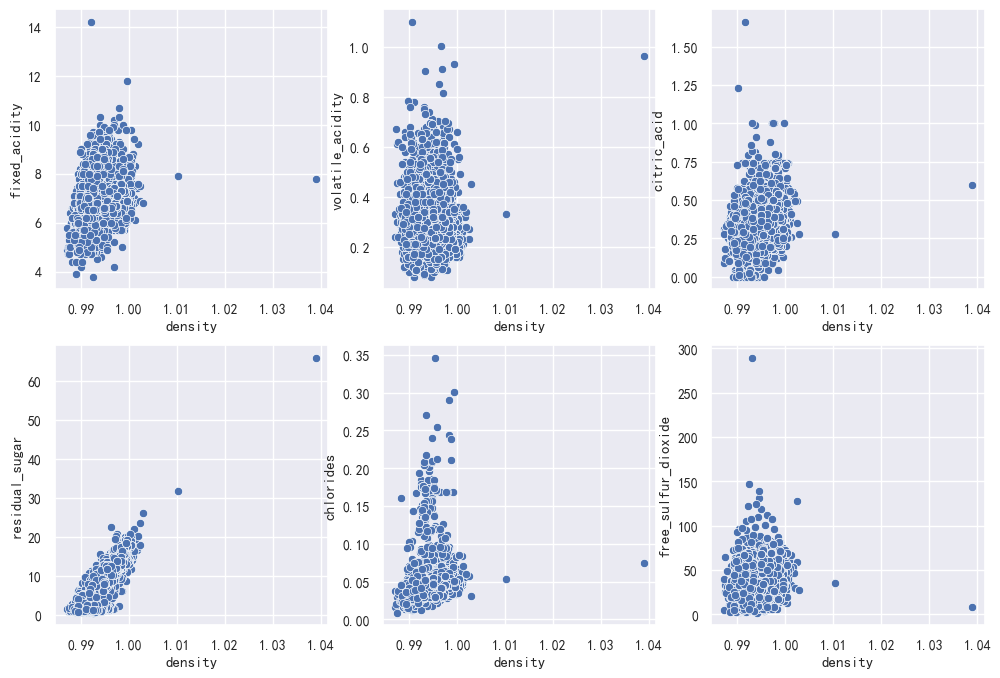

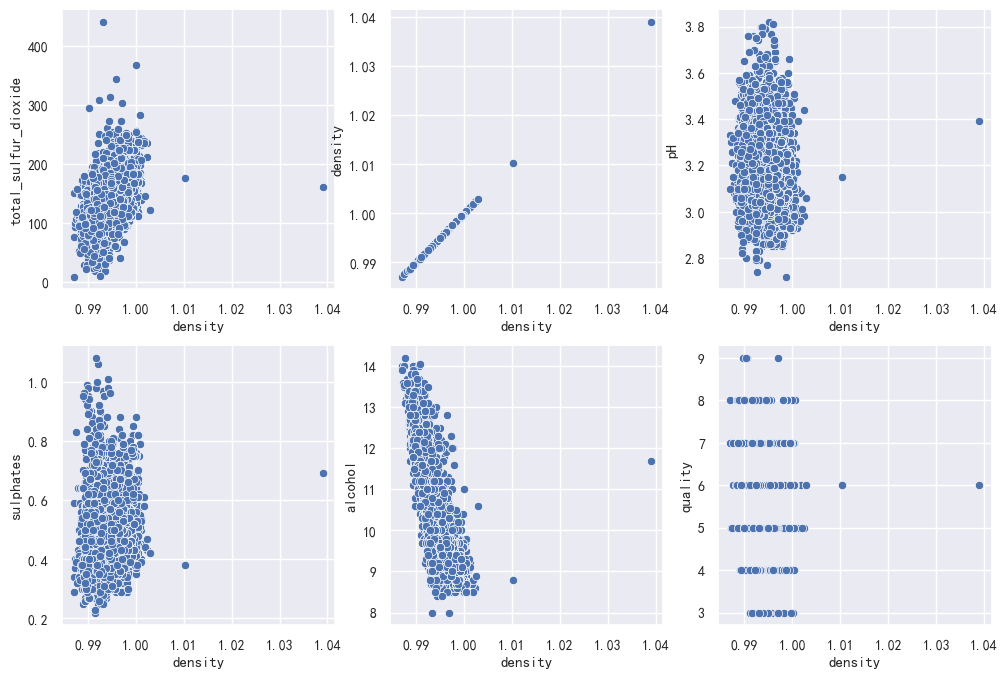

In [49]:
# 看看热力图里MIC较高的density，确实有比较强的线性关系
draw_scatter('density')